# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.07.13

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

29276


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

<module 'ImageAnalysis3.spot_tools.fitting' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\spot_tools\\fitting.py'>

In [21]:
fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418',
             'save_folder':r'F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418_warp',
             'experiment_type': 'DNA',
             'num_threads': 44,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [6]:
_overwrite = False

_save_images = False

_fit_spots = True

bad_fov_ids = [17,25,69,77,85,88,106,115,121,124,148,152,159,170,179,197]

#sel_fov_ids = np.arange(0,100) # batch 1 in mendel
sel_fov_ids = np.arange(194,200) # batch 1 in mendel

for _fov_id in sel_fov_ids:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    if _fov_id < 10:
        _save_images = True
    else:
        _save_images = False
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "combo_ref_id", 0)
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    
    # 3. unique
    fov.parallel = True
    setattr(fov, "unique_ref_id", 0)
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 78
- Number of field of views: 200
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66C67', 'H67U1', 'H68U2', 'H69U3', 'H70U4', 'H71U5', 'H

-- checking combo, region:[119 120 174] in 0.012s.
-- checking combo, region:[121 122] in 0.010s.
-- checking combo, region:[123 124] in 0.010s.
-- checking combo, region:[125 126 177] in 0.011s.
-- checking combo, region:[127 128 178] in 0.011s.
-- checking combo, region:[129 130] in 0.010s.
-- checking combo, region:[131 132 180] in 0.010s.
-- checking combo, region:[133 134 181] in 0.011s.
-- checking combo, region:[135 136 182] in 0.011s.
-- checking combo, region:[137 138 183] in 0.011s.
-- checking combo, region:[139 140 184] in 0.010s.
-- checking combo, region:[141 142 185] in 0.010s.
-- checking combo, region:[143 144 186] in 0.010s.
-- checking combo, region:[145 146 187] in 0.010s.
-- checking combo, region:[147 148 188] in 0.011s.
-- checking combo, region:[149 150 189] in 0.011s.
+ Start multi-processing of pre-processing for 67 images with 44 threads
++ processing combo ids: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24 

-- saving 750_647_561_bleed profile to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_195.hdf5.
save type: combo"
-- saving combo to file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_195.hdf5
--- combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.011s.
save type: unique"
-- saving unique to file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_195.hdf5
--- unique attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.009s.
save type: relabeled_combo"
-- saving relabeled_combo to file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_195.hdf5
--- relabeled_combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_195.dax
- correct the

++ base attributes saved:['dapi_im'] in 8.140s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 78
- Number of field of views: 200
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66C67',

-- checking combo, region:[175 168] in 0.009s.
-- checking combo, region:[179 176] in 0.008s.
-- checking combo, region:[103 104 166] in 0.009s.
-- checking combo, region:[105 106 167] in 0.008s.
-- checking combo, region:[107 108] in 0.007s.
-- checking combo, region:[109 110 169] in 0.008s.
-- checking combo, region:[111 112 170] in 0.008s.
-- checking combo, region:[113 114 171] in 0.009s.
-- checking combo, region:[115 116 172] in 0.009s.
-- checking combo, region:[117 118 173] in 0.009s.
-- checking combo, region:[119 120 174] in 0.008s.
-- checking combo, region:[121 122] in 0.008s.
-- checking combo, region:[123 124] in 0.008s.
-- checking combo, region:[125 126 177] in 0.008s.
-- checking combo, region:[127 128 178] in 0.008s.
-- checking combo, region:[129 130] in 0.007s.
-- checking combo, region:[131 132 180] in 0.008s.
-- checking combo, region:[133 134 181] in 0.008s.
-- checking combo, region:[135 136 182] in 0.009s.
-- checking combo, region:[137 138 183] in 0.008s.
-- c

-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5.
-- saving 561_chromatic profile to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5, skip.
-- saving 561_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5.
-- saving 750_647_561_bleed profile to save_file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5.
save type: combo"
-- saving c

 25 26 27 28] , finish in 647.60s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_197.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_197.dax  in 6.863s
-- removing hot pixels for channels:['405'] in 9.756s
-- illumination correction for channels: 405, in 2.897s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 20.480s
-- saving fov_info to file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_197.hdf5
++ base attributes saved:['dapi_im'] in 8.037s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 78
- Number of field of views: 200
- Importing csv format color_usage file: \\10.245.74.158\Chrom

-- checking combo, region:[159 160 194] in 0.009s.
-- checking combo, region:[161 162 195] in 0.009s.
-- checking combo, region:[163 164] in 0.008s.
-- checking combo, region:[175 168] in 0.008s.
-- checking combo, region:[179 176] in 0.008s.
-- checking combo, region:[103 104 166] in 0.009s.
-- checking combo, region:[105 106 167] in 0.009s.
-- checking combo, region:[107 108] in 0.008s.
-- checking combo, region:[109 110 169] in 0.009s.
-- checking combo, region:[111 112 170] in 0.009s.
-- checking combo, region:[113 114 171] in 0.009s.
-- checking combo, region:[115 116 172] in 0.009s.
-- checking combo, region:[117 118 173] in 0.009s.
-- checking combo, region:[119 120 174] in 0.009s.
-- checking combo, region:[121 122] in 0.008s.
-- checking combo, region:[123 124] in 0.008s.
-- checking combo, region:[125 126 177] in 0.009s.
-- checking combo, region:[127 128 178] in 0.009s.
-- checking combo, region:[129 130] in 0.009s.
-- checking combo, region:[131 132 180] in 0.010s.
-- check

+ Start multi-processing of pre-processing for 10 images with 44 threads
++ processing unique ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 428.90s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_199.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_199.dax  in 7.137s
-- removing hot pixels for channels:['405'] in 9.842s
-- illumination correction for channels: 405, in 2.923s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 20.830s
-- saving fov_info to file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Conv_zscan_199.hdf5
++ base attributes saved:['dapi_im'] in 7.

# visualization

In [126]:
_fov_id = 2

In [127]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 78
- Number of field of views: 200
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66C67', 'H67U1', 'H68U2', 'H69U3', 'H70U4', 'H71U5', 'H

In [128]:
# 2. Process image into candidate spots
fov.parallel = False
setattr(fov, "combo_ref_id", 0)
fov._process_image_to_spots('combo', 
                            _sel_ids=[1,2,3,195],
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=True, _fit_spots=False,
                            _overwrite_drift=False, _overwrite_image=False,
                            _overwrite_spot=False)


-- folders not selected, allow processing all 77 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_002.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_002.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418\H0C1\Conv_zscan_002.dax  in 5.936s
-- removing hot pixels for channels:['488'] in 9.897s
-- illumination correction for channels: 488, in 3.788s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 20.601s
-- saving fov_info to file: F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418_warp\Conv_zscan_002.hdf5
++ base attributes saved:['combo_ref_im'] in 9.479s.
-- checking combo, region:[1 2] in 0.011s.
-- checking combo, region:[3] in 0.009s.
-- checking 

In [177]:
fov._load_dapi_image();

directly return existing attribute.


<IPython.core.display.Javascript object>


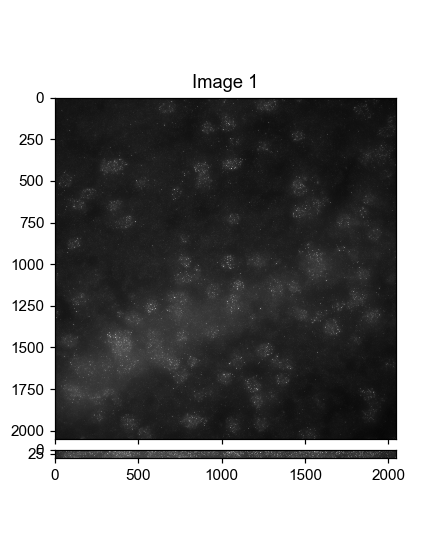

In [149]:
visual_tools.imshow_mark_3d_v2(list(_ims)+[transSegLabels, transSegLabels==cell_id])

## Load images

In [155]:
vis_ids = np.array([0,1,2,193], dtype=np.int32)
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f['combo']
    _ims = _grp['ims'][vis_ids,:,:,:]
    _ids = _grp['ids'][vis_ids]

## Load segmentation

In [141]:
segLabel_filename = os.path.join(r'F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418',
                                 'Analysis_0709', 'Segmentation', fov.fov_name.replace('.dax','_Segmentation.hdf5'))
with h5py.File(segLabel_filename, 'r') as _f:
    segLabels = _f[str(fov.fov_id)]['dna_mask'][:]
transSegLabels = np.flip(segLabels.transpose((0,2,1)),axis=(2,))

# Plot example cell

In [158]:
from skimage.measure import find_contours

cell_id = 33 # 96

vertices = (find_contours((transSegLabels==cell_id).max(0))[0])

xs, ys = np.where((transSegLabels==cell_id).any(0))

size_x = np.max(xs) - np.min(xs)
size_y = np.max(ys) - np.min(ys)
print(size_x, size_y)

radius = np.round( (max(size_x, size_y) + 20 )/2 )

_center = np.round([np.median(xs), np.median(ys)])

crop = ia.classes.preprocess.ImageCrop_3d([[0, len(_ims[0])], 
                                           [_center[0]-radius, _center[0]+radius], 
                                           [_center[1]-radius, _center[1]+radius],])

pixel_sizes = fov.shared_parameters['distance_zxy']

107 144


<IPython.core.display.Javascript object>


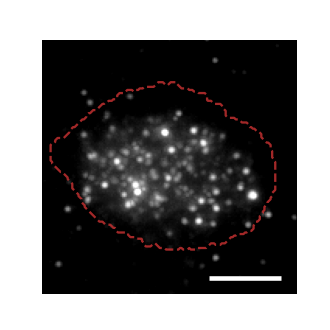

<IPython.core.display.Javascript object>


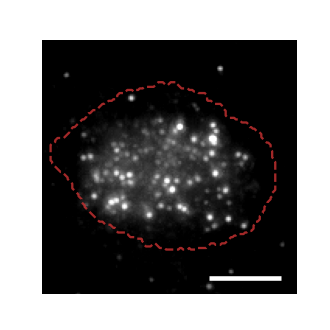

<IPython.core.display.Javascript object>


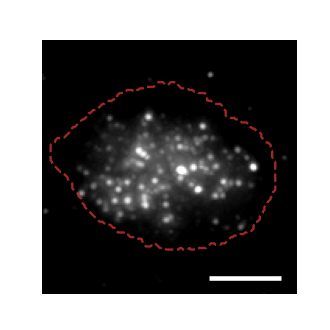

<IPython.core.display.Javascript object>


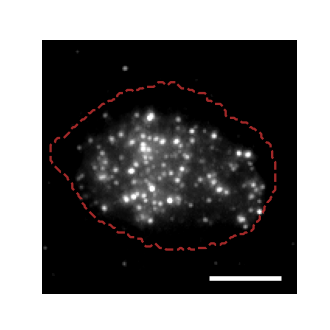

In [174]:
for _id, _im in zip(_ids, _ims):
    _crop_im = _im[crop.to_slices()]
    _pixel_values = _im[transSegLabels==cell_id]
    _pixel_values = _pixel_values[_pixel_values>0]
    vmin, vmax = scipy.stats.scoreatpercentile(_pixel_values, 50), scipy.stats.scoreatpercentile(_crop_im, 99.995)
    
    fig, ax = plt.subplots(figsize=(1,1),dpi=300)
    
    ax.imshow(_im.max(0), vmin=vmin, vmax=vmax, cmap='Greys_r')

    ax.plot(vertices[:,1], vertices[:,0], linestyle='--', color=[0.8,0.2,0.2,0.8], linewidth=0.5)
    ax.set_ylim([_center[0]-radius, _center[0]+radius])
    ax.set_xlim([_center[1]-radius, _center[1]+radius])

    ax.tick_params('both', labelsize=7, 
                   width=0, length=0,
                   pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0) for i in ax.spines.items()]

    ax.hlines(_center[0]-radius+10, 
              _center[1]+radius-10 - 5000/pixel_sizes[-1], _center[1]+radius-10, 
              colors=[1,1,1], linewidth=1)
    figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_bit_{_id}.pdf")
    fig.savefig(figure_panel_filename, transparent=True)
    figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_bit_{_id}.png")
    fig.savefig(figure_panel_filename, transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


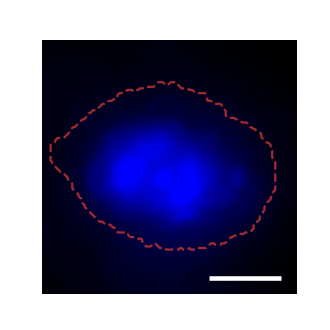

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [176]:
from scipy.stats import scoreatpercentile
_id = 'dapi'

_crop_im = _im[crop.to_slices()]

fig, ax = plt.subplots(figsize=(1,1),dpi=300)

dapi_im = fov.dapi_im.max(0).copy()
dapi_im = (dapi_im - scoreatpercentile(dapi_im,10)) / (scoreatpercentile(dapi_im,99)-scoreatpercentile(dapi_im,10))

_full_im = np.array([np.zeros_like(dapi_im), 
                     np.zeros_like(dapi_im), 
                     dapi_im]).transpose((1,2,0))

ax.imshow(_full_im, 
          vmin=vmin, vmax=vmax, cmap='Greys_r')

ax.plot(vertices[:,1], vertices[:,0], linestyle='--', color=[0.8,0.2,0.2,0.8], linewidth=0.5)
ax.set_ylim([_center[0]-radius, _center[0]+radius])
ax.set_xlim([_center[1]-radius, _center[1]+radius])

ax.tick_params('both', labelsize=7, 
               width=0, length=0,
               pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0) for i in ax.spines.items()]

ax.hlines(_center[0]-radius+10, 
          _center[1]+radius-10 - 5000/pixel_sizes[-1], _center[1]+radius-10, 
          colors=[1,1,1], linewidth=1)

figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_dapi.pdf")
fig.savefig(figure_panel_filename, transparent=True)
figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_dapi.png")
fig.savefig(figure_panel_filename, transparent=True, bbox_inches='tight', pad_inches=0)

# Plot decoded

'Conv_zscan_002_Segmentation.hdf5'

In [110]:
33 -> oligo
34 -> L6b
65 -> Peri


In [122]:
xs, ys = np.where((segLabels==65).any(0))
_flt = (data_df['x_hat'] > min(xs)) & (data_df['x_hat'] < max(xs)) & (data_df['y_hat'] > min(ys)) & (data_df['y_hat'] < max(ys))
data_df[_flt]

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,sig_z,center_intensity,center_internal_dist,codebook_name,num_spots,uindex,rowID,Score,fiberidx,numfiber
6,1,0713,143,Peri,chr1,8740008,8759916,2,1791.025450,1935.537200,...,1,2362.348750,124.842103,CTP11,2,2,515611,4031.743313,1,1
20,1,0713,143,Peri,chr1,13741888,13757922,6,1800.951133,1932.373100,...,1,1612.924200,130.554728,CTP11,3,4,515625,4031.743313,1,1
36,1,0713,143,Peri,chr1,21249750,21259997,10,1802.429933,1941.527300,...,1,3505.972800,256.205713,CTP11,3,7,515641,4031.743313,1,1
43,1,0713,143,Peri,chr1,21732182,21745770,12,1801.212267,1937.647600,...,1,3353.270967,81.895042,CTP13,3,1020,515648,4031.743313,1,1
50,1,0713,143,Peri,chr1,23749258,23759965,14,1804.083150,1934.241250,...,1,1120.677600,231.017506,CTP11,2,8,515655,4031.743313,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0713,143,Peri,chrX,151244970,151259694,54,1744.702300,1947.221467,...,1,959.813523,135.966248,CTP11,3,979,522912,3762.585186,2,2
140,1,0713,143,Peri,chrX,158749404,158759978,57,1752.841200,1967.639550,...,1,2559.921150,132.621205,CTP11,2,982,522926,3762.585186,2,2
144,1,0713,143,Peri,chrX,163750534,163758706,59,1768.285300,1972.217767,...,1,2602.701967,90.060405,CTP11,3,984,522930,3762.585186,2,2
149,1,0713,143,Peri,chrX,168746045,168757590,62,1770.480300,1965.565600,...,1,1750.881150,262.333070,CTP11,2,986,522935,3762.585186,2,2


<IPython.core.display.Javascript object>


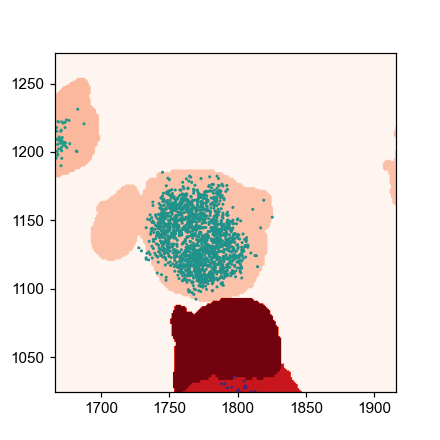

(-0.5, 2047.5, -0.5, 2047.5)

In [98]:
plt.figure(figsize=(4,4), dpi=100)
plt.imshow(segLabels.max(0), cmap='Reds', vmax=150)

plt.scatter(data_df['y_hat'], data_df['x_hat'], c=data_df['finalcellID'], s=1)

plt.xlim([0,2048])
plt.ylim([0,2048])
plt.axis('equal')

In [95]:
transSegLabels = np.flip(segLabels,axis=(2))

<IPython.core.display.Javascript object>


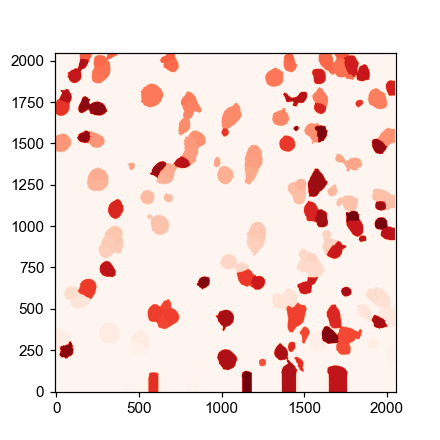

(-0.5, 2047.5, -0.5, 2047.5)

In [97]:
plt.figure(figsize=(4,4), dpi=100)
plt.imshow(segLabels.max(0), cmap='Reds', vmax=150)

#plt.scatter(data_df['y_hat'], data_df['x_hat'], c=data_df['finalcellID'], s=1)

plt.xlim([0,2048])
plt.ylim([0,2048])
plt.axis('equal')

In [31]:
# load blair's data
import pandas as pd
data_folder = r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\0814-Sample_Result_Blair'
data_df = pd.read_hdf(os.path.join(data_folder, r'0713_SE_1_spalign.h5'))

In [34]:
ind_2_type = {}
for _type, _cellind in zip(data_df['celltype'], data_df['finalcellID']):
    ind_2_type[_cellind] = _type
    

In [117]:
for _ind in np.unique(data_df['finalcellID']):
    _cell_df = data_df[data_df['finalcellID']==_ind]
    #_zxys = 
    print(_ind, len(_cell_df), np.unique(_cell_df['celltype']))

76 93 ['Astro']
77 1010 ['Oligo']
78 811 ['Oligo']
79 613 ['L6b']
80 30 ['Endo']
81 794 ['Astro']
82 876 ['L6b']
83 408 ['Astro']
84 140 ['L6b']
85 388 ['L6 CT']
86 91 ['Oligo']
87 258 ['Oligo']
88 65 ['Oligo']
90 38 ['L6b']
91 91 ['L6 CT']
92 38 ['Astro']
94 132 ['L6 CT']
95 418 ['L6b']
96 120 ['Endo']
97 36 ['Oligo']
98 42 ['Oligo']
99 1059 ['Oligo']
100 39 ['L6 CT']
102 139 ['L6b']
103 1265 ['Endo']
104 662 ['L6 CT']
106 189 ['L6 CT']
107 1003 ['Oligo']
108 297 ['L6b']
109 506 ['L6b']
110 379 ['Astro']
111 1608 ['Oligo']
112 1836 ['L6b']
113 1758 ['OPC']
114 723 ['Oligo']
115 1350 ['Oligo']
116 55 ['Oligo']
117 1685 ['Oligo']
118 1175 ['Oligo']
119 1565 ['Oligo']
120 1714 ['L6b']
121 2425 ['Peri']
122 902 ['Oligo']
123 102 ['L6 CT']
124 465 ['Endo']
125 1308 ['Oligo']
126 1148 ['Micro']
127 1532 ['Oligo']
128 1040 ['Endo']
129 1495 ['Oligo']
130 1379 ['Oligo']
131 56 ['L6b']
132 1354 ['Oligo']
133 1444 ['Oligo']
134 453 ['Oligo']
135 1053 ['Oligo']
136 448 ['Astro']
137 1181 ['Oligo

In [50]:
data_df

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,sig_z,center_intensity,center_internal_dist,codebook_name,num_spots,uindex,rowID,Score,fiberidx,numfiber
10,1,0713,78,Oligo,chr1,9627926,9637875,3,1077.288800,332.148620,...,1,1913.290867,219.918838,CTP13,3,1016,288215,1686.762774,1,2
19,1,0713,78,Oligo,chr1,16251322,16259969,7,1090.147767,330.732673,...,1,1462.608500,221.913551,CTP11,3,5,288224,1686.762774,1,2
25,1,0713,78,Oligo,chr1,21249750,21259997,10,1093.507967,346.114940,...,1,10542.629000,126.463883,CTP11,3,7,288230,1686.762774,1,2
30,1,0713,78,Oligo,chr1,21522568,21534512,11,1101.965300,348.002887,...,1,1608.354847,74.313230,CTP13,3,1019,288235,1686.762774,1,2
36,1,0713,78,Oligo,chr1,23749258,23759965,14,1097.869533,354.616573,...,1,2874.671467,202.003492,CTP11,3,8,288241,1686.762774,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,0713,162,Oligo,chrX,146246596,146260000,53,1525.591700,1398.450767,...,1,4313.772900,75.630079,CTP11,3,978,592224,1932.325827,1,1
86,1,0713,162,Oligo,chrX,151244970,151259694,54,1520.184200,1397.712233,...,1,1140.151447,196.341601,CTP11,3,979,592225,1932.325827,1,1
88,1,0713,162,Oligo,chrX,153743904,153759903,55,1526.348700,1398.892250,...,1,1688.393400,270.636035,CTP11,2,980,592227,1932.325827,1,1
95,1,0713,162,Oligo,chrX,163750534,163758706,59,1520.019950,1400.868900,...,1,2331.085700,224.276311,CTP11,2,984,592234,1932.325827,1,1


In [46]:
_fov_id

1

In [47]:
ref_export_file = r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\Decoded_Fov-1.hdf5'

with h5py.File(ref_export_file, 'r') as _f:
    print(_f.keys())
    ref_cell_ids = list(_f.keys())
ref_cell_ids = [int(_n.split('-')[1]) for _n in ref_cell_ids]

<KeysViewHDF5 ['Cell-102', 'Cell-103', 'Cell-104', 'Cell-105', 'Cell-106', 'Cell-107', 'Cell-109', 'Cell-111', 'Cell-112', 'Cell-113', 'Cell-114', 'Cell-116', 'Cell-119', 'Cell-122', 'Cell-123', 'Cell-128', 'Cell-129', 'Cell-130', 'Cell-131', 'Cell-132', 'Cell-134', 'Cell-135', 'Cell-138', 'Cell-139', 'Cell-14', 'Cell-141', 'Cell-146', 'Cell-15', 'Cell-16', 'Cell-17', 'Cell-18', 'Cell-19', 'Cell-2', 'Cell-21', 'Cell-22', 'Cell-23', 'Cell-24', 'Cell-26', 'Cell-27', 'Cell-28', 'Cell-29', 'Cell-30', 'Cell-31', 'Cell-32', 'Cell-33', 'Cell-34', 'Cell-36', 'Cell-37', 'Cell-39', 'Cell-40', 'Cell-41', 'Cell-42', 'Cell-43', 'Cell-44', 'Cell-45', 'Cell-46', 'Cell-47', 'Cell-50', 'Cell-51', 'Cell-52', 'Cell-53', 'Cell-55', 'Cell-57', 'Cell-58', 'Cell-59', 'Cell-60', 'Cell-61', 'Cell-64', 'Cell-65', 'Cell-66', 'Cell-67', 'Cell-68', 'Cell-69', 'Cell-70', 'Cell-71', 'Cell-74', 'Cell-75', 'Cell-8', 'Cell-88', 'Cell-89', 'Cell-9', 'Cell-90', 'Cell-91', 'Cell-92', 'Cell-93', 'Cell-94', 'Cell-95', 'Cell

In [57]:
data_df

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,sig_z,center_intensity,center_internal_dist,codebook_name,num_spots,uindex,rowID,Score,fiberidx,numfiber
10,1,0713,78,Oligo,chr1,9627926,9637875,3,1077.288800,332.148620,...,1,1913.290867,219.918838,CTP13,3,1016,288215,1686.762774,1,2
19,1,0713,78,Oligo,chr1,16251322,16259969,7,1090.147767,330.732673,...,1,1462.608500,221.913551,CTP11,3,5,288224,1686.762774,1,2
25,1,0713,78,Oligo,chr1,21249750,21259997,10,1093.507967,346.114940,...,1,10542.629000,126.463883,CTP11,3,7,288230,1686.762774,1,2
30,1,0713,78,Oligo,chr1,21522568,21534512,11,1101.965300,348.002887,...,1,1608.354847,74.313230,CTP13,3,1019,288235,1686.762774,1,2
36,1,0713,78,Oligo,chr1,23749258,23759965,14,1097.869533,354.616573,...,1,2874.671467,202.003492,CTP11,3,8,288241,1686.762774,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,0713,162,Oligo,chrX,146246596,146260000,53,1525.591700,1398.450767,...,1,4313.772900,75.630079,CTP11,3,978,592224,1932.325827,1,1
86,1,0713,162,Oligo,chrX,151244970,151259694,54,1520.184200,1397.712233,...,1,1140.151447,196.341601,CTP11,3,979,592225,1932.325827,1,1
88,1,0713,162,Oligo,chrX,153743904,153759903,55,1526.348700,1398.892250,...,1,1688.393400,270.636035,CTP11,2,980,592227,1932.325827,1,1
95,1,0713,162,Oligo,chrX,163750534,163758706,59,1520.019950,1400.868900,...,1,2331.085700,224.276311,CTP11,2,984,592234,1932.325827,1,1


In [54]:
pd.read_hdf(ref_export_file, 'Cell-104')

,region_name,chr,start,end,center_z,center_x,center_y,center_intensity,center_internal_dist,codebook_name,data_type,num_spots,index,chr_order,subclass
0,17:43750175-43759987,17,43750175,43759987,7344.641833,50041.30968,183761.7336,9973.829233,21.563805,CTP11,combo,3,852,25,Oligo
1,8:8751397-8760001,8,8751397,8760001,5138.930833,49312.99476,180366.1380,6514.322167,47.376251,CTP11,combo,3,434,3,Oligo
2,18:33751923-33759934,18,33751923,33759934,4864.940250,48959.70552,180278.3520,8629.151333,147.714754,CTP11,combo,3,885,21,Oligo
3,15:76251370-76259993,15,76251370,76259993,8586.190333,51771.53772,183334.7484,4728.998700,45.333732,CTP11,combo,3,787,50,Oligo
4,19:43749394-43759990,19,43749394,43759990,4937.142833,47716.22016,183039.9264,6405.241033,70.262892,CTP11,combo,3,923,45,Oligo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,18:65894510-65906268,18,65894510,65906268,9967.361625,52850.78010,182396.8584,2246.390350,296.596881,CTP13,combo,2,1933,51,Oligo
4424,10:84122257-84132220,10,84122257,84132220,7177.401000,46463.30100,182257.4898,595.509415,280.642133,CTP13,combo,2,1585,71,Oligo
4425,6:127115243-127126502,6,127115243,127126502,10379.507000,52413.32880,179143.6554,434.359310,207.652543,CTP13,combo,2,1386,95,Oligo
4426,16:58480348-58489387,16,58480348,58489387,8149.782625,50487.28488,177049.7460,566.530115,280.582315,CTP13,combo,2,1860,46,Oligo


In [56]:
data_df[data_df['finalcellID']==78]

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,sig_z,center_intensity,center_internal_dist,codebook_name,num_spots,uindex,rowID,Score,fiberidx,numfiber
10,1,0713,78,Oligo,chr1,9627926,9637875,3,1077.288800,332.148620,...,1,1913.290867,219.918838,CTP13,3,1016,288215,1686.762774,1,2
19,1,0713,78,Oligo,chr1,16251322,16259969,7,1090.147767,330.732673,...,1,1462.608500,221.913551,CTP11,3,5,288224,1686.762774,1,2
25,1,0713,78,Oligo,chr1,21249750,21259997,10,1093.507967,346.114940,...,1,10542.629000,126.463883,CTP11,3,7,288230,1686.762774,1,2
30,1,0713,78,Oligo,chr1,21522568,21534512,11,1101.965300,348.002887,...,1,1608.354847,74.313230,CTP13,3,1019,288235,1686.762774,1,2
36,1,0713,78,Oligo,chr1,23749258,23759965,14,1097.869533,354.616573,...,1,2874.671467,202.003492,CTP11,3,8,288241,1686.762774,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,0713,78,Oligo,chr19,51240975,51259942,51,1117.741500,364.135115,...,1,3951.687350,37.253304,CTP11,2,926,290507,441.707225,1,1
124,1,0713,78,Oligo,chr19,53752016,53760001,52,1120.012150,360.454570,...,1,881.573400,214.762433,CTP11,2,927,290509,441.707225,1,1
126,1,0713,78,Oligo,chr19,56250020,56259971,53,1112.556150,361.379590,...,1,2474.038250,94.775764,CTP11,2,928,290511,441.707225,1,1
130,1,0713,78,Oligo,chr19,58748508,58759979,54,1115.503633,362.107533,...,1,2922.390500,114.918811,CTP11,3,929,290515,441.707225,1,1


In [49]:
len(ind_2_type)

83

In [42]:
len(ind_2_type)

83

In [44]:
len(ref_cell_ids)

75

In [ ]:
visual_tools

In [7]:
fov.combo_ids

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18